# CAR PRICE PREDICTION

In [1]:
# Iporting necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('/content/quikr_car (2).csv')

In [3]:
# Make a copy of the original for backup
df_backup = df.copy()

In [4]:
# 1. Handle Missing Values
# Remove rows where 'year' is not numeric or is null
df = df[df['year'].notna() & df['year'].str.isnumeric()]
df['year'] = df['year'].astype(int)

<ipython-input-4-e85ba0ee6ea7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


In [5]:
# Remove rows where 'fuel_type' is missing
df = df[df['fuel_type'].notna()]

In [6]:
# 2. Remove Duplicates
# ------------------------------
df.drop_duplicates(inplace=True)

In [7]:
# Clean and convert 'Price' column
df = df[df['Price'].notna() & (df['Price'] != 'Ask For Price')]
df['Price'] = df['Price'].str.replace(',', '').astype(int)

<ipython-input-7-46de61e10fbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(',', '').astype(int)


In [8]:
# Clean and convert 'kms_driven' column
df = df[df['kms_driven'].notna()]
df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace(',', '')
df = df[df['kms_driven'].str.isnumeric()]
df['kms_driven'] = df['kms_driven'].astype(int)

In [9]:
# Standardize 'name' column: first 3 words
df['name'] = df['name'].str.split().str[:3].str.join(' ')

In [10]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [11]:
# Remove extremely high prices (e.g., more than 6 million)
df = df[df['Price'] < 6000000]

In [12]:
# Remove entries with year out of logical range (e.g., <1990 or >2025)
df = df[(df['year'] >= 1990) & (df['year'] <= 2025)]

In [13]:
# Optionally remove outliers using IQR method for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [14]:
# 5. Summary Statistics (EDA)
# ------------------------------
summary = df.describe(include='all')
print(summary)

                       name company         year          Price  \
count                   679     679   679.000000     679.000000   
unique                  230      21          NaN            NaN   
top     Maruti Suzuki Swift  Maruti          NaN            NaN   
freq                     46     201          NaN            NaN   
mean                    NaN     NaN  2012.194404  317976.571429   
std                     NaN     NaN     4.176126  202544.079060   
min                     NaN     NaN  1995.000000   30000.000000   
25%                     NaN     NaN  2010.000000  160000.000000   
50%                     NaN     NaN  2013.000000  274999.000000   
75%                     NaN     NaN  2015.000000  432500.000000   
max                     NaN     NaN  2019.000000  970000.000000   

           kms_driven fuel_type  
count      679.000000       679  
unique            NaN         3  
top               NaN    Petrol  
freq              NaN       378  
mean     47439.917526    

In [15]:
# Optional: Display value counts for categorical columns
categorical_summary = {
    'company_counts': df['company'].value_counts(),
    'fuel_type_counts': df['fuel_type'].value_counts(),
    'name_counts': df['name'].value_counts().head(10)
}


In [16]:
# Save cleaned dataset
df.to_csv('Cleaned_Quikr_Car_Data.csv', index=False)

In [17]:
# Print output for inspection
print("Cleaned Dataset Shape:", df.shape)
print("\nSummary Statistics:\n", summary)
print("\nCategorical Summaries:\n", categorical_summary)

Cleaned Dataset Shape: (679, 6)

Summary Statistics:
                        name company         year          Price  \
count                   679     679   679.000000     679.000000   
unique                  230      21          NaN            NaN   
top     Maruti Suzuki Swift  Maruti          NaN            NaN   
freq                     46     201          NaN            NaN   
mean                    NaN     NaN  2012.194404  317976.571429   
std                     NaN     NaN     4.176126  202544.079060   
min                     NaN     NaN  1995.000000   30000.000000   
25%                     NaN     NaN  2010.000000  160000.000000   
50%                     NaN     NaN  2013.000000  274999.000000   
75%                     NaN     NaN  2015.000000  432500.000000   
max                     NaN     NaN  2019.000000  970000.000000   

           kms_driven fuel_type  
count      679.000000       679  
unique            NaN         3  
top               NaN    Petrol  
freq 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Set style for all plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

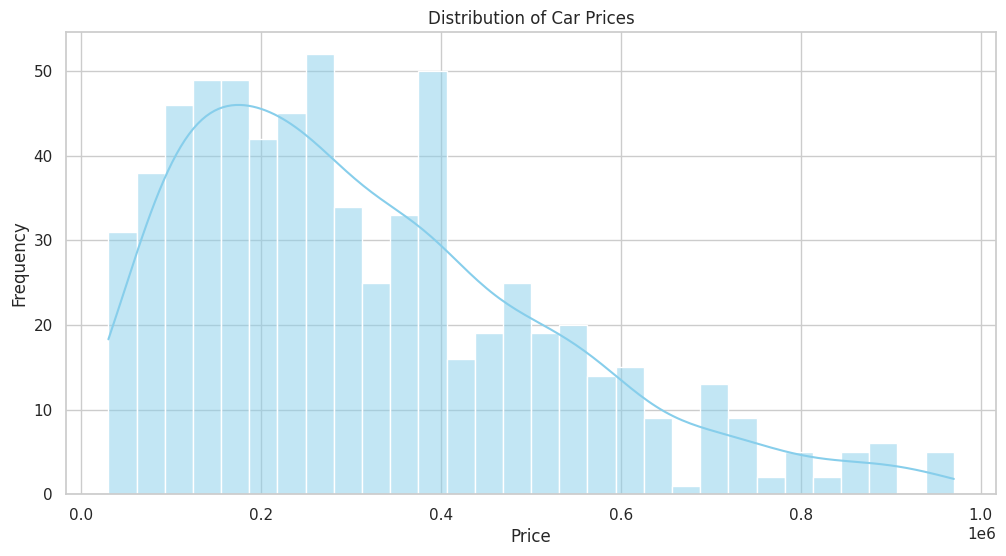

In [20]:
# 1. Histograms
# ------------------------------

# Histogram for Price
plt.figure()
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

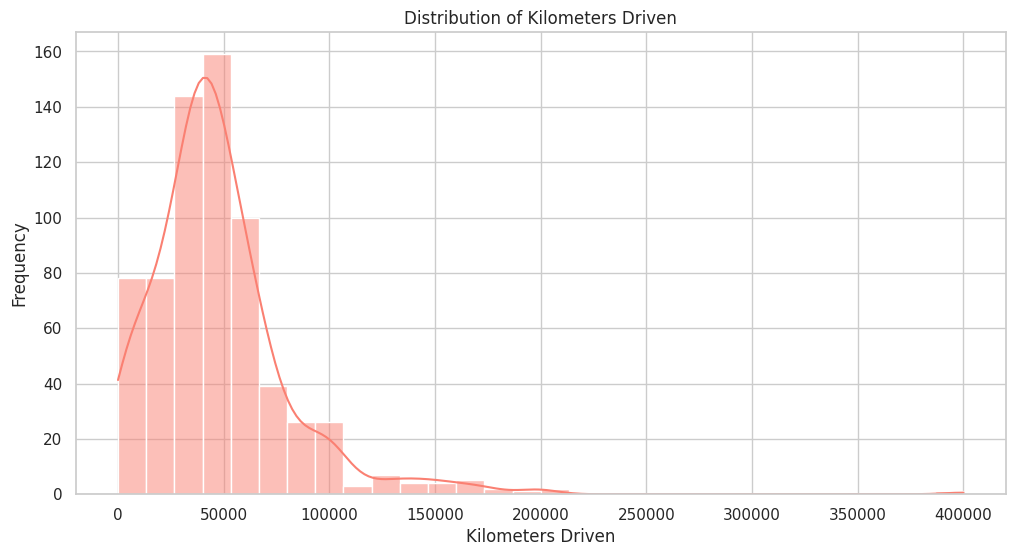

In [21]:
# Histogram for Kilometers Driven
plt.figure()
sns.histplot(df['kms_driven'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

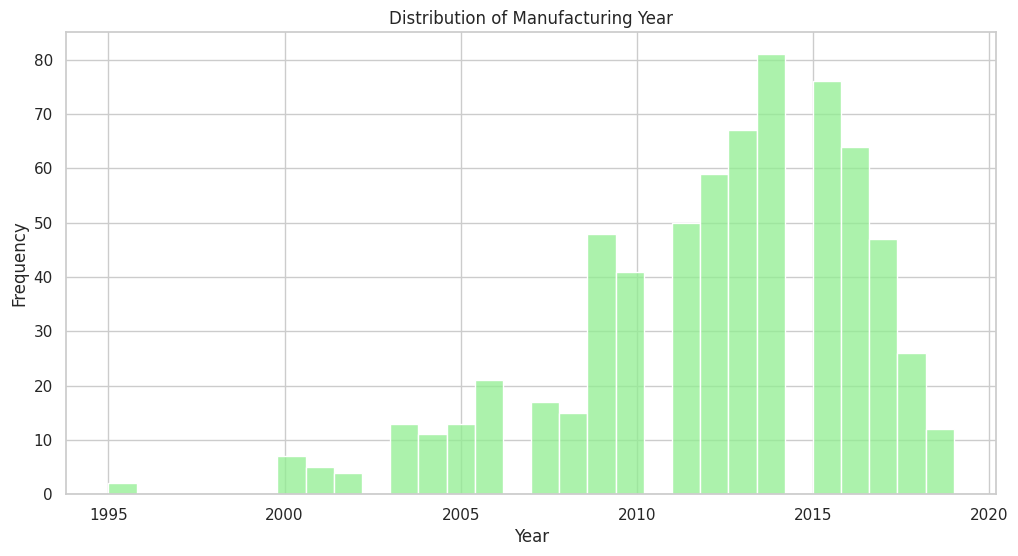

In [22]:
# Histogram for Year
plt.figure()
sns.histplot(df['year'], bins=30, kde=False, color='lightgreen')
plt.title('Distribution of Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

<ipython-input-23-67fc556ae32a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='Price', data=df, palette='pastel')


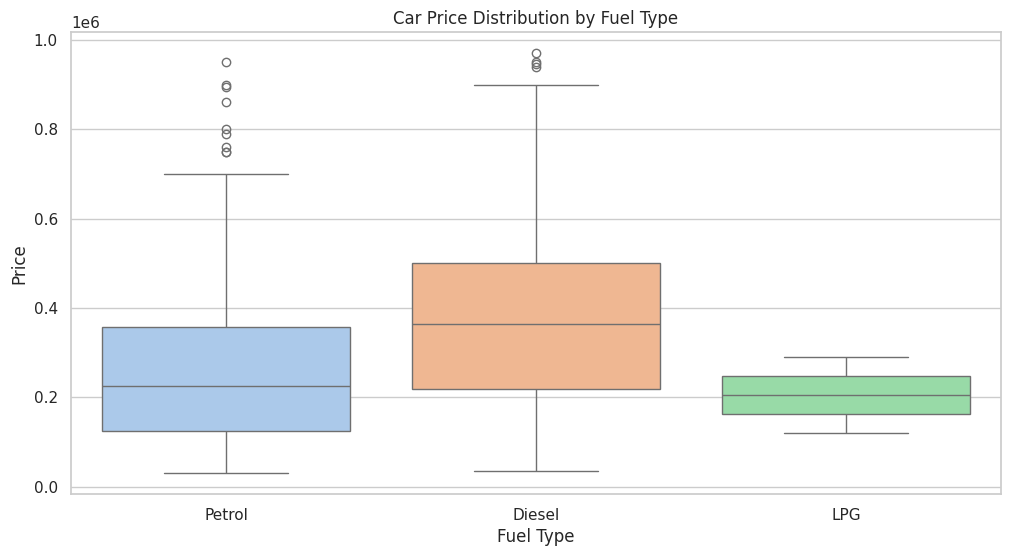

In [23]:
# 2. Box Plots
# ------------------------------

# Boxplot: Price by Fuel Type
plt.figure()
sns.boxplot(x='fuel_type', y='Price', data=df, palette='pastel')
plt.title('Car Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

<ipython-input-24-462e9c8fbe3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company', y='Price', data=df[df['company'].isin(top_companies)], palette='muted')


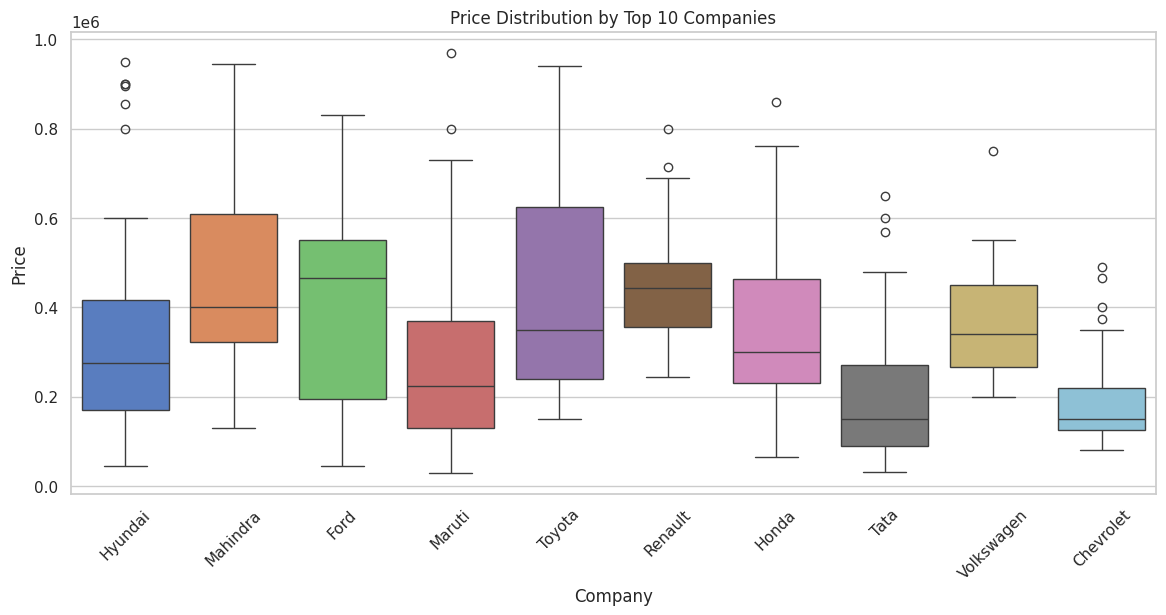

In [24]:
# Boxplot: Price by Company (top 10 companies)
top_companies = df['company'].value_counts().nlargest(10).index
plt.figure(figsize=(14,6))
sns.boxplot(x='company', y='Price', data=df[df['company'].isin(top_companies)], palette='muted')
plt.title('Price Distribution by Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

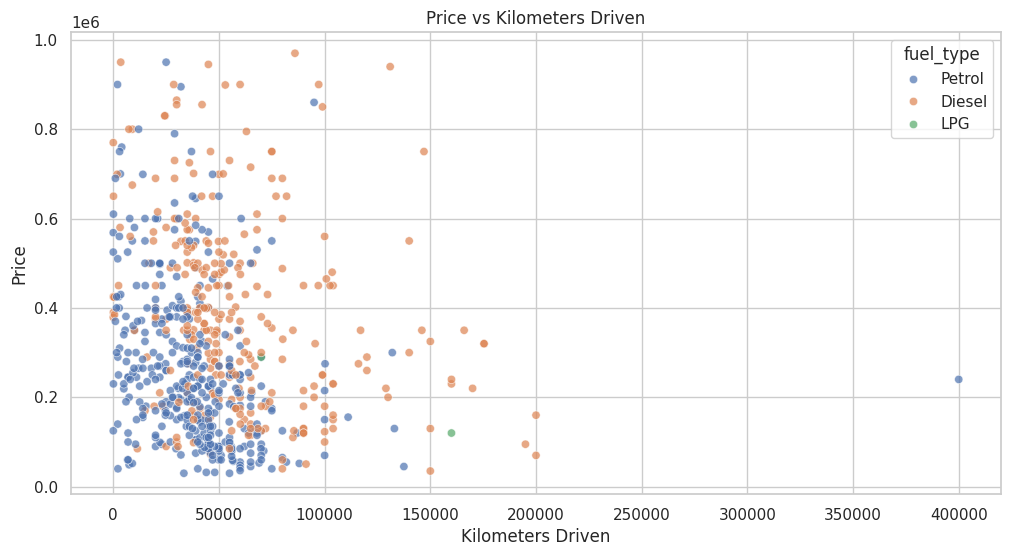

In [25]:
# 3. Scatter Plots
# ------------------------------

# Scatter: Price vs. Kilometers Driven
plt.figure()
sns.scatterplot(x='kms_driven', y='Price', data=df, hue='fuel_type', alpha=0.7)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

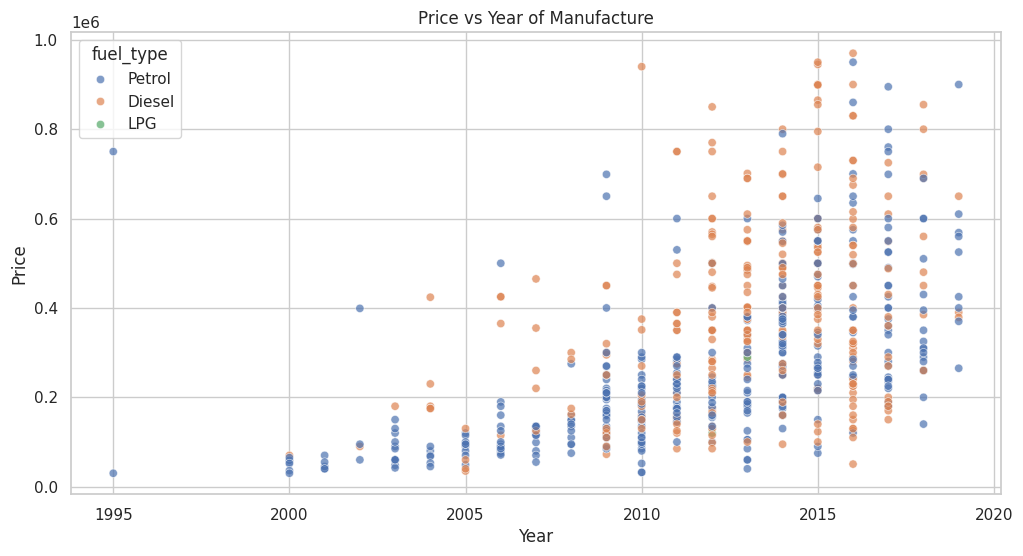

In [26]:
# Scatter: Price vs. Year
plt.figure()
sns.scatterplot(x='year', y='Price', data=df, hue='fuel_type', alpha=0.7)
plt.title('Price vs Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [27]:
# 4. Correlation Matrix
# ------------------------------

# Compute correlation (only numeric columns)
corr_matrix = df[['year', 'Price', 'kms_driven']].corr()

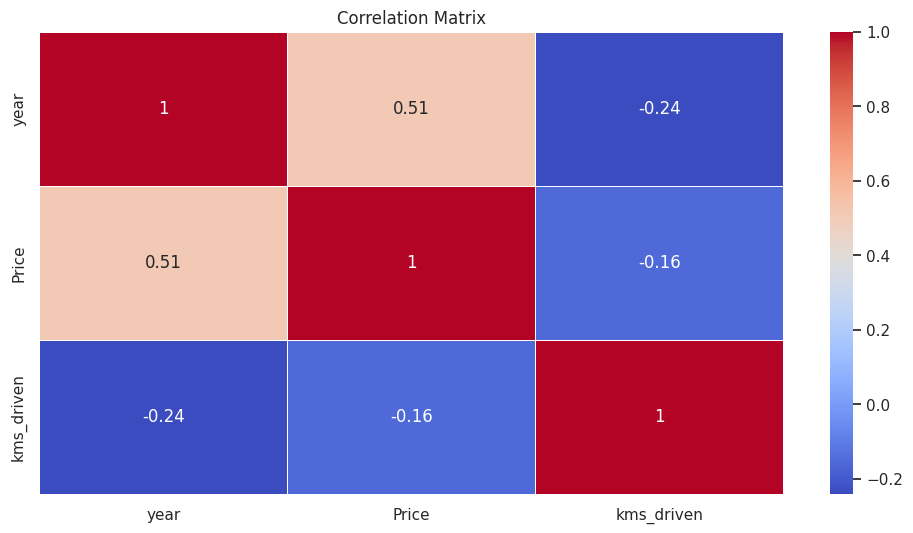

In [28]:
# Plot heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
# Feature Engineering
# ------------------------------

# Extract company from name (if not already present)
df['company'] = df['name'].str.split().str[0]

In [31]:

# Create age feature (current year - manufacturing year)
current_year = 2023  # Update as needed
df['age'] = current_year - df['year']

In [32]:
# Create price_per_km (price divided by kilometers driven)
# Adding small constant to avoid division by zero
df['price_per_km'] = df['Price'] / (df['kms_driven'] + 1)

In [33]:
# Encode categorical variables
# For company (high cardinality), we'll use label encoding
le = LabelEncoder()
df['company_encoded'] = le.fit_transform(df['company'])

In [34]:
# For fuel_type (low cardinality), we'll use one-hot encoding
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['fuel_type'])
    ],
    remainder='passthrough'
)

In [35]:
# Prepare features and target
X = df[['company_encoded', 'kms_driven', 'age', 'fuel_type']]
y = df['Price']

In [36]:
# Apply one-hot encoding to fuel_type
X_encoded = ct.fit_transform(X)

In [37]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [38]:
# Feature scaling
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
  # Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

In [41]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

In [42]:

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Performance Comparison:")
print(results_df.sort_values(by='RMSE'))


Model Performance Comparison:
                             MAE           MSE           RMSE        R2
Gradient Boosting  106955.175868  2.286514e+10  151212.249066  0.520769
Random Forest      105256.521334  2.454030e+10  156653.430077  0.485659
XGBoost            111986.976562  2.721331e+10  164964.559394  0.429636
KNN                120208.988235  2.746985e+10  165740.310359  0.424259
Linear Regression  131518.801527  3.145791e+10  177363.783946  0.340673
Lasso Regression   131518.902042  3.145796e+10  177363.933235  0.340672
Ridge Regression   131521.862402  3.146302e+10  177378.183570  0.340566
SVR                165998.212632  5.108912e+10  226029.032926 -0.070778


In [43]:
# Let's select the best model based on RMSE
best_model_name = results_df['RMSE'].idxmin()
best_model = models[best_model_name]


In [44]:
print(f"\nBest Model: {best_model_name}")



Best Model: Gradient Boosting


In [45]:
# Detailed evaluation of best model
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)


In [46]:
print("\nTraining Performance:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"R2: {r2_score(y_train, y_pred_train):.2f}")


Training Performance:
MAE: 78368.34
MSE: 11148112516.20
RMSE: 105584.62
R2: 0.72


In [47]:
print("\nTest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"R2: {r2_score(y_test, y_pred_test):.2f}")


Test Performance:
MAE: 106955.18
MSE: 22865144267.46
RMSE: 151212.25
R2: 0.52



Feature Importances:
            Feature  Importance
5               age    0.444764
3   company_encoded    0.252826
4        kms_driven    0.202340
0  fuel_type_Diesel    0.089422
2  fuel_type_Petrol    0.010647
1     fuel_type_LPG    0.000000


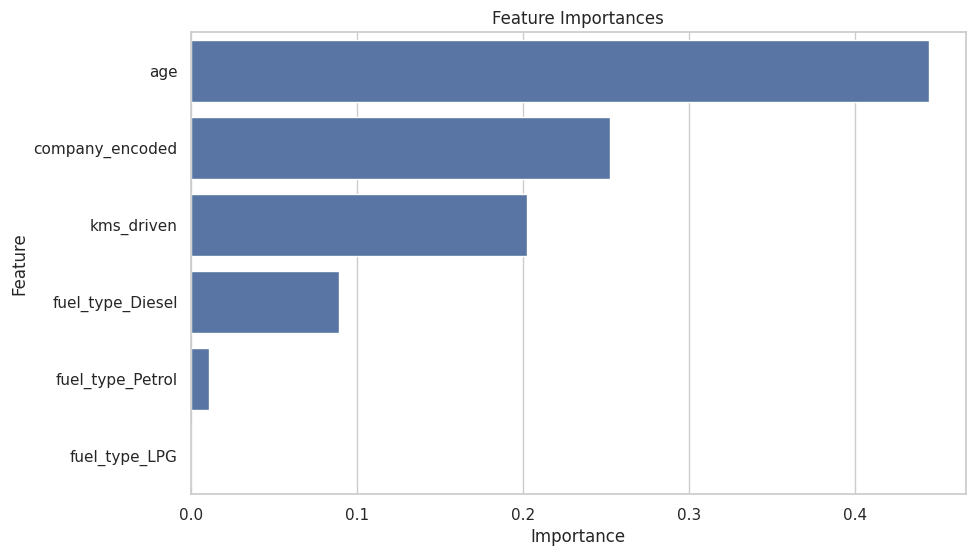

In [53]:
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    print("\nFeature Importances:")
    # Get feature names after one-hot encoding
    feature_names = (ct.named_transformers_['onehot']
                    .get_feature_names_out(['fuel_type'])).tolist()
    feature_names.extend(['company_encoded', 'kms_driven', 'age'])

    importances = best_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importances')
    plt.show()
elif hasattr(best_model, 'coef_'):
    print("\nModel Coefficients:")
    # Get feature names after one-hot encoding
    feature_names = (ct.named_transformers_['onehot']
                    .get_feature_names_out(['fuel_type'])).tolist()
    feature_names.extend(['company_encoded', 'kms_driven', 'age'])

    if isinstance(best_model, (LinearRegression, Ridge, Lasso)):
        coef_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': best_model.coef_
        }).sort_values('Coefficient', ascending=False)
        print(coef_df)

        # Plot coefficients
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Feature', data=coef_df)
        plt.title('Model Coefficients')
        plt.show()

In [54]:
# Visual comparison of model performance
metrics = ['MAE', 'RMSE', 'R2']
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

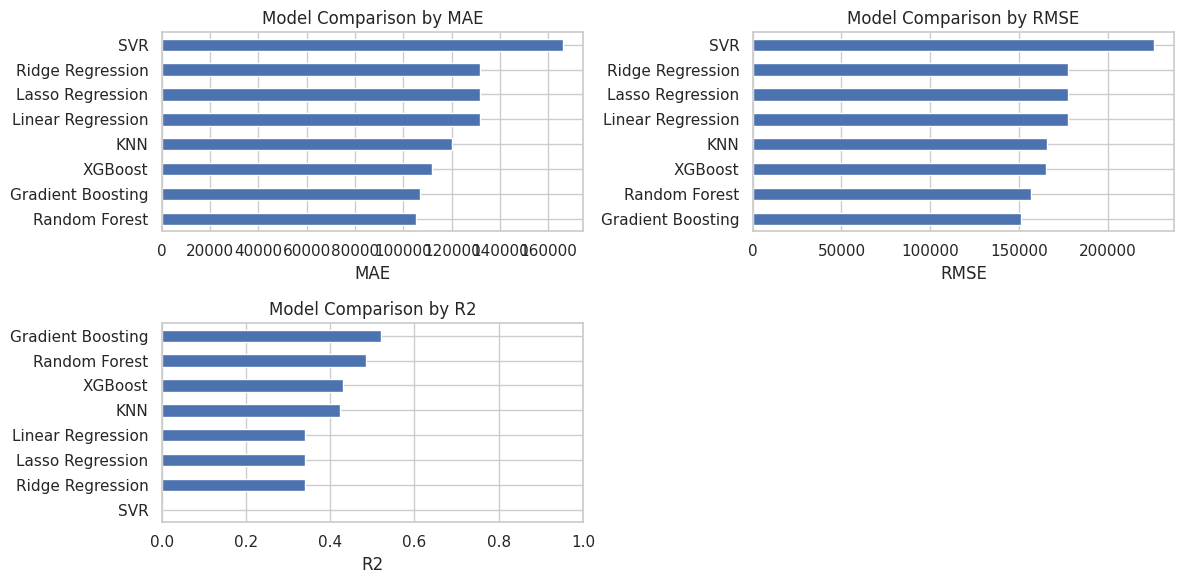

In [57]:
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    results_df[metric].sort_values().plot(kind='barh')
    plt.title(f'Model Comparison by {metric}')
    plt.xlabel(metric)

    if metric == 'R2':
        plt.xlim(0, 1)  # R2 has range [0,1] for good models

plt.tight_layout()
plt.show()


In [58]:
# Select best model based on RMSE
final_model = models[results_df['RMSE'].idxmin()]
print(f"\nSelected Model: {type(final_model).__name__}")


Selected Model: GradientBoostingRegressor


In [59]:
# Save the best model
import joblib
joblib.dump(final_model, 'best_car_price_model.pkl')
joblib.dump(ct, 'preprocessor.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("\nModel and preprocessing objects saved successfully.")


Model and preprocessing objects saved successfully.


In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# Perform cross-validation on best model
cv_scores = cross_val_score(
    final_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

In [62]:
print("\nCross-Validation RMSE Scores:")
print([f"{abs(score):.2f}" for score in cv_scores])
print(f"Mean CV RMSE: {abs(cv_scores.mean()):.2f} (±{cv_scores.std():.2f})")


Cross-Validation RMSE Scores:
['161388.47', '142375.63', '146745.61', '163845.45', '134972.50']
Mean CV RMSE: 149865.53 (±11098.21)


In [63]:
# Learning curve for best model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)


In [64]:
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

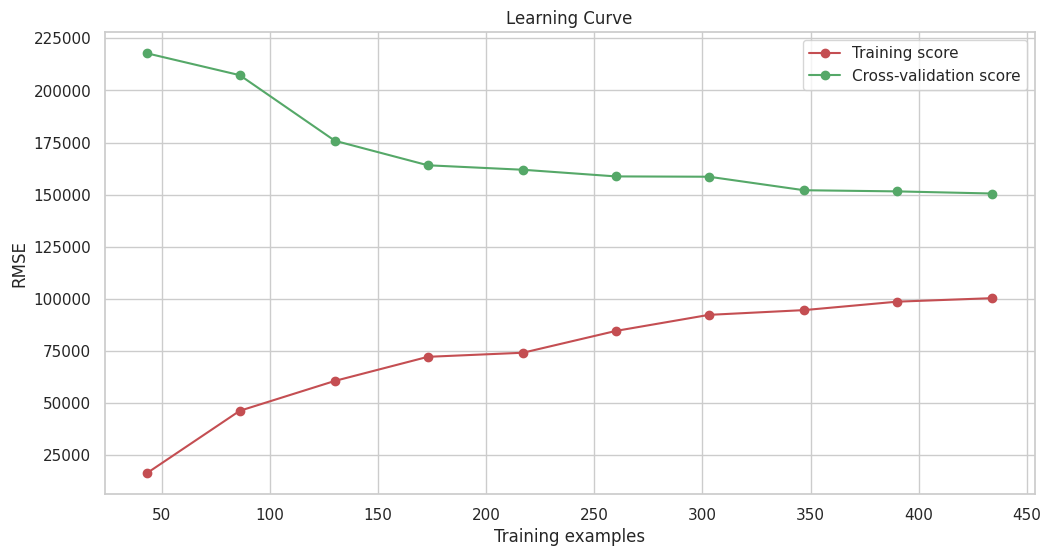

In [65]:
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()